<h1><center><span style="border-style:solid;border-width:1px;border-radius:5px;
    padding:5px;background-color:yellow;box-shadow: 6px 6px 6px black;">Activité 1  Encodages NRZ et manchester</span></center></h1>
    
On dispose d'un message binaire "010111010100111101" dans un fichier.

On souhaite transmettre ce message binaire en le transformant en un signal électrique encodé en NRZ puis en manchester.



# 1. Encodage NRZ

On utilisera l'encodage NRZ respectant les règles suivantes:

- niveau haut: 5V   ---> 1

- niveau bas: -5V   ---> 0

la durée d'un bit est fixée à Tb = 1ms et la fréquence d'échantillonnage est fe = 10 kHz. 



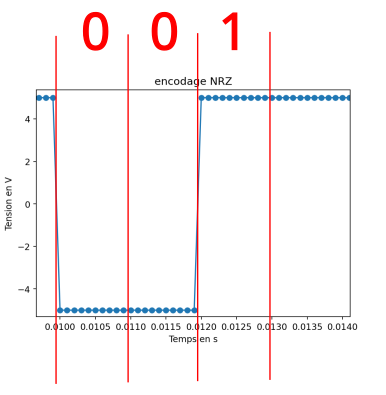


!!! question  Question 1

**En utilisant les données ci-desssus, déterminer le nombre d'échantillon pendant la durée d'un bit.**
    
!!!

!!! question Question 2

**Compléter les variables manquantes avec leurs valeurs respectives dans le script ci-dessous. Exécuter cette portion de script afin de stocker les valeurs des variables en mémoire**
!!!

In [1]:
import matplotlib.pyplot as plt

message = "010111010100111101"
niveau_haut = ...
niveau_bas = ...
nbr_ech_bit = ...
fe=...


L'objectif final étant de construire le signal physique, il est nécéssaire de construire la séquence d'échantillon entre -5 et +5 à partir du message binaire. Pour celà, nous aurons besoin d'utiliser les boucles et la méthode append()

# Rappels:


!!! tip méthode append():

La méthode append() permet d'ajouter des éléments à la fin d'une liste:

!!!

Ex:

In [2]:
liste=[0,1,2,3]
liste.append(4)
liste

[0, 1, 2, 3, 4]

!!! tip Boucles for:

Il existe différentes syntaxes pour les boucles for en python. Observez-bien les exemples ci-dessous et choisissez celle qui convient le mieux:

!!!

In [3]:
liste=[0,1,2,3,4]
liste2=[]

for i in range(len(liste)):
    liste2.append(2*liste[i])
    
liste2

[0, 2, 4, 6, 8]

In [4]:
liste=[0,1,2,3,4]
liste2=[]

for elts in liste:
    liste2.append(2*elts)

liste2

[0, 2, 4, 6, 8]

In [14]:
liste=[0,1,2,3,4]

liste2=[2*elts for elts in liste]

liste2

[0, 2, 4, 6, 8]

!!! question Question 3

**Créer une liste vide nommée signal, puis écrire une boucle for permettant de la remplir en respectant les conditions suivantes:**

- La boucle for examine chaque élément contenu dans la variable message.

- si l'élément examiné est un '0' alors on ajoute dans la liste signal la valeur correspondant au niveau_haut, autant de fois que le nbr_ech_bit.

- si l'élément examiné est un '1', on fait la même chose mais avec la valeur correspondant au niveau_bas

!!!


!!! note pseudo code
Pour chaque élément dans message faire

    Si élément est égal à '0' alors
    
        Pour i de 1 à nbr_ech_bit faire
        
            Ajouter niveau_haut à signal
            
        Fin Pour
        
    Sinon si élément est égal à '1' alors
    
        Pour i de 1 à nbr_ech_bit faire
        
            Ajouter niveau_bas à signal
            
        Fin Pour
        
    Fin Si
    
Fin Pour
!!!


!!! question Question 4

**Afficher le graphique signal = f(t) en utilisant des ronds reliés entre eux par une ligne:**

- générer d'abord une liste contenant les valeurs de t: chaque échantillon dans la liste signal et séparée par une durée $T_e = \dfrac{1}{f_e}$.

!!!


!!! tip méthode arange() de numpy:

Chercher des informations sur la méthode np.arange() afin de générer la liste t

!!!

In [1]:
import numpy as np

t = np.arange(..., ..., ...)

print(t)

plt.figure(0)
plt.clf()
plt.plot(... , ... ,'o-')     
plt.xlabel('Temps en s')
plt.show()

Traceback (most recent call last):
  File "<input>", line 3, in <module>
TypeError: unsupported operand type(s) for -: 'ellipsis' and 'ellipsis'


Error: 

!!! question Question 5

**Récapituler toutes les étapes précédentes en créant une fonction encode_NRZ(message, niveau_haut, niveau_bas, nbr_ech_bit) renvoyant la liste signal ET la liste des temps associés avec comme paramètres:**

- message: le message binaire à encoder (type String)

- niveau_haut, niveau_bas: les niveaux de tension correspondants aux 1 et 0

- nbr_ech_bit: le nombre d'échantillons par bit (=fe\*Tb)


!!!

In [7]:
def encode_NRZ(message, niveau_haut, niveau_bas, nbr_ech_bit):
    
    
    
    
    
    
    
    
    
    return t, signal


#Appel de la fonction et génération du graphe

t, signal = encode_NRZ(message, niveau_haut, niveau_bas, nbr_ech_bit)

plt.figure(1)
plt.clf()
plt.plot(..., ...,'o-')  
plt.title('encodage NRZ')
plt.ylabel('Tension en V')
plt.xlabel('Temps en s')
plt.show()
    

# 2. Encodage Manchester

On prendra comme caractéristique de l'encodage manchester:

- Le bit à transmettre est un '1': transition haut-bas au milieu de l'intervalle
- Le bit à transmettre est un '0': transition bas-haut au milieu de l'intervalle

Les transitions s'effectuent entre +5 et -5V.


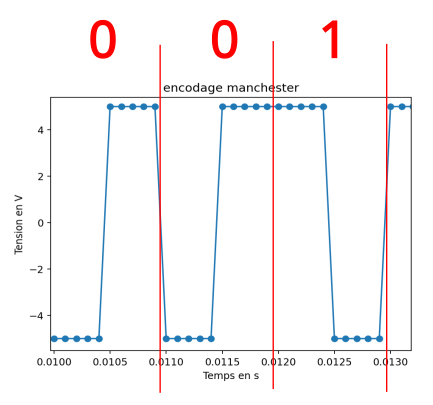


!!! question Question 6

**Adapter l'étude précédente afin de réaliser la fonction encode_manchester(message, niveau_haut, niveau_bas, nbr_ech_bit) permettant de réaliser l'encodage du message binaire en manchester.**

!!!


In [8]:
def encode_manchester(message, niveau_haut, niveau_bas, nbr_ech_bit):
    
    
    
    
    
    
    
    
    return t, signal



#Appel de la fonction et génération du graphe

t, signal = encode_manchester(message, niveau_haut, niveau_bas, nbr_ech_bit)

plt.figure(2)
plt.clf()
plt.plot(t,signal,'o-')  
plt.title('encodage manchester')
plt.ylabel('Tension en V')
plt.xlabel('Temps en s')
plt.show()

# 3. Étude spectrale

On donne la fonction permettant de calculer le spectre S d'un signal:



In [9]:
import numpy as np
from numpy.fft import fft

def spectre(signal,fe):
    N = len(signal)
    S = fft(signal)
    S = 2/N*np.abs(S[0:N//2])
    S[0]=S[0]/2
    f = np.linspace(0.0,1/2*fe,N//2)
    return f,S


Pour un meilleur affichage du spectre, le calcul doit se faire sur un message suffisamment long et aléatoire.


!!! question Question 7

**Écrire un boucle utilisant le module random permettant de générer une variable message de type String contenant une succession aléatoire de '1' et '0' (10000 valeurs)**

!!!

In [2]:
import random







!!! question Question 8

**Faire calculer le spectre du signal encodé en NRZ en utilisant la fonction donnée ci-dessus et afficher son spectre:**

!!!

In [11]:
fe = 10000

t, signal = ...
f, S = ....

#Affichage du spectre

plt.figure(3)
plt.clf()
plt.plot(f,S)  
plt.title('spectre encodage NRZ')
plt.ylabel('Tension en V')
plt.xlabel('Fréquence en Hz')
plt.show()

!!! question Question 9

**Faire calculer le spectre du signal encodé en manchester et afficher son spectre:**

!!!

In [12]:
t, signal = ...
f, S = ...

#Affichage du spectre:

plt.figure(4)
plt.clf()
plt.plot(f,S)  
plt.title('spectre encodage manchester')
plt.ylabel('Tension en V')
plt.xlabel('Fréquence en Hz')
plt.show()

!!! question Question 10

**Connaissant la valeur de la durée d'un bit Tb (identiques pour les deux cas), calculer le débit binaire D. Commenter l'aspect des deux spectres (NRZ et manchester): valeur à 0 Hz, largeur du premier lobe.**

!!!

# 4. Encodage USB (NRZI)

!!! question Question 11

**Écrire une fonction permettant l'encodage d'un message selon le standard USB:**

- l'Usb utilise l'encodage NRZI ('0' = transition et '1' = pas de transition)

- Le système utilise le "bit stuffing", au bout de six '1' consécutifs le système ajoute un '0' pour forcer une transition (afin de faciliter la récupération de l'horloge).

!!!

In [13]:
message='01010111001100000000000000000000000000000001111111111111111111111111111111111111111111111111000000000000'

def encode_usb(message, niveau_haut, niveau_bas, nbr_ech_bit):
    
    
    
    
    
    
    
    
    
    
    
    return t, signal


#Appel de la fonction et génération du graphe

t, signal = encode_usb(message, niveau_haut, niveau_bas, nbr_ech_bit)

plt.figure(5)
plt.clf()
plt.plot(t,signal,'-')  
plt.title('encodage usb')
plt.ylabel('Tension en V')
plt.xlabel('Temps en s')
plt.show()